### 1.) Linear SVC in case of linear separation

- load the Iris dataset (can be found in sklearn API)
- scale the data and plot the petal length vs petal width in a scatterplot colored with the target
- train an SVC model with linear kernel with default parameter settings, but once with C=1 and then C=1000
- visualize the model's decision boundary and the margins based on the coefficients learnt by the model
- interpret the results, what is the role of the C hyperparameter?


### 2.) Linear SVC but non-linear separation

- create a dataset with the following: X, y = sklearn.datasets.make_moons(noise=0.1, random_state=0)
- perform the same steps just as in the previous exercise and use the linear kernel for  the SVC
- since linear SVC cannot do non-linear separation, you will need to do some workaround, for example adding polynomial features (3rd order would be a good choice)
- write down with your own words in few sentences how the support vector machine works 

### 3.) Load the dataset from 2 weeks ago and build/evaluate the SVC with default settings

Reminder:
- you need to build a classifier that predicts the probability of a sample coming from a cancerous (tumor type is normal or not) person based on the measured protein levels
- train the SVM classifier (SVC in sklearn API) on every second sample (not first 50% of the data (!), use every second line)
- generate prediction for the samples that were not used during the training

To-do now:
- build default SVC, but set it to predict probabilities
- plot the ROC curve and calculate the confusion matrix for the predictions
- do the same for the CancerSEEK predictions and compare your model's performance to CancerSEEK performance (as a reference, plot it on the same figure)
- how good is the performance of the new model?


### 4.) Scale data and try different kernels

- scale your data before applying the SVC model
- plot the ROC curve and calculate the confusion matrix for the predictions
- do your model perform better or worse after scaling? 
- try out other kernels (linear, poly) and evaluate the performance of the model the same way

### 5.) Split the data randomly to 3 parts: 70% train, 15% validation, 15% test data and tune hyperparameters

- prepare data as described in the title, then scale all input based on the training set
- select your best performing SVC model from the previous exercise
- check the behaviour of the SVC by modifying at least 3 of its hyperparameters (C, gamma, ...) and plot the AUC value vs the modified parameter (logscale may be better for visualization)
- create plots (at least 2) that shows the train, val and test accuracy based on a given hyperparameter's different values. Is it a good idea to rely on validation data when tuning hyperparameter in this case?
- select the best settings, train the SVC and evaluate with reference to CancerSEEK results with the ROC curve and the confusion matrix (match your results with CancerSEEK's results on the same dataset splitting)

### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# Task 1

In [2]:
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(X)

Text(0, 0.5, 'Sepal Width')

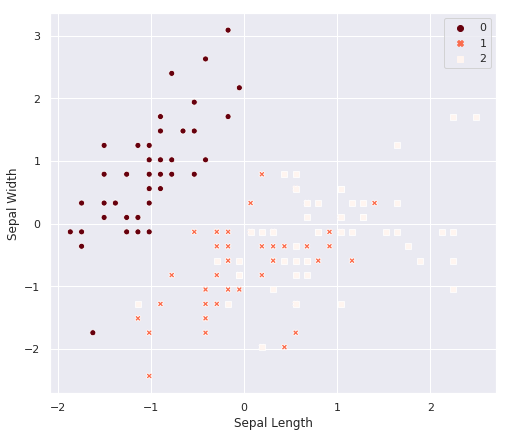

In [4]:
# plotting the features and their labels
plt.figure(figsize=(8, 7))
sns.scatterplot(x=np.array([X[i][0] for i in range(X.shape[0])]), y=np.array([X[i][1] for i in range(X.shape[0])]), hue=y,
                style=y, palette="Reds_r")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In [5]:
from sklearn.svm import SVC


scv_c1 = SVC(kernel='linear', C=1).fit(X, y)
scv_c1000 = SVC(kernel='linear', C=1000).fit(X, y)

In [6]:
# defining function to make the plotting of the boundary easier
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Text(0.5, 1.0, 'Decison boundary of SVM model with linear kernel and C=1')

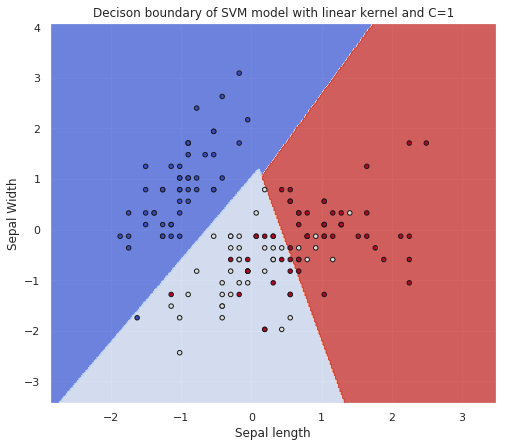

In [7]:
fig, ax = plt.subplots(figsize=(8, 7))
# setting up grid for plotting
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, scv_c1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Sepal Width')
ax.set_xlabel('Sepal length')
ax.set_title('Decison boundary of SVM model with linear kernel and C=1')

Text(0.5, 1.0, 'Decison boundary of SVM model with linear kernel and C=1000')

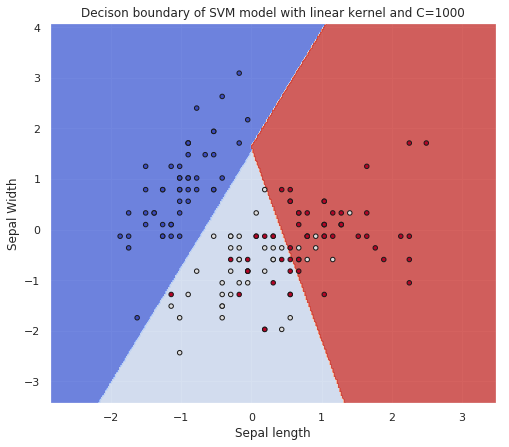

In [8]:
fig2, ax2 = plt.subplots(figsize=(8, 7))
# setting up grid for plotting

plot_contours(ax2, scv_c1000, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax2.set_ylabel('Sepal Width')
ax2.set_xlabel('Sepal length')
ax2.set_title('Decison boundary of SVM model with linear kernel and C=1000')

The only difference between the two plots is the boundary separating classes 0 and 2. On the second the boundary is closer to class 2. The C parameter is the regularization parameter. The strength of the regularization is inversely proportional to C.

# Task 2

In [9]:
from sklearn.datasets import make_moons


#transforming the features
X2, y2 = make_moons(noise=0.1, random_state=0)
X2_ = X2
X2 = X2**3
X2 = scaler.fit_transform(X2)

Text(0.5, 1.0, 'Dataset with transformed features')

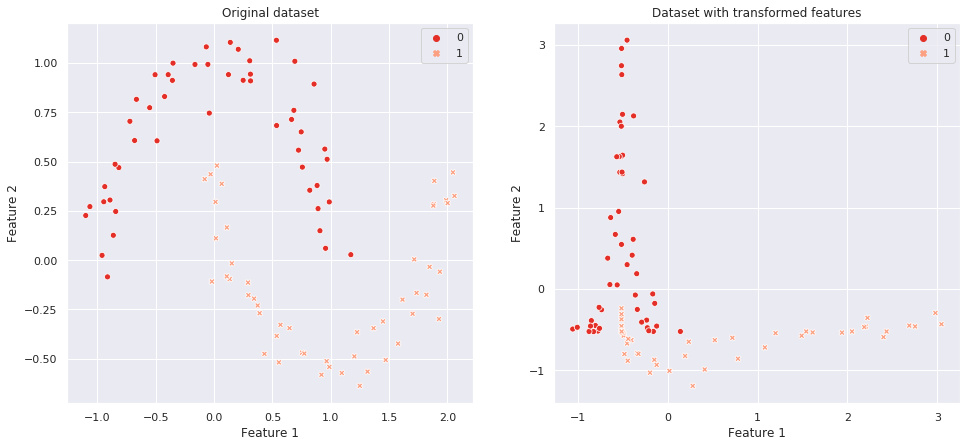

In [10]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x=np.array([X2_[i][0] for i in range(X2.shape[0])]), y=np.array([X2_[i][1] for i in range(X2_.shape[0])]), hue=y2,
                style=y2, palette="Reds_r")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original dataset', size=12)


plt.subplot(1, 2, 2)
sns.scatterplot(x=np.array([X2[i][0] for i in range(X2.shape[0])]), y=np.array([X2[i][1] for i in range(X2.shape[0])]), hue=y2,
                style=y2, palette="Reds_r")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with transformed features', size=12)

Text(0.5, 1.0, 'Decison boundary of SVm model with linear kernel and transformed features')

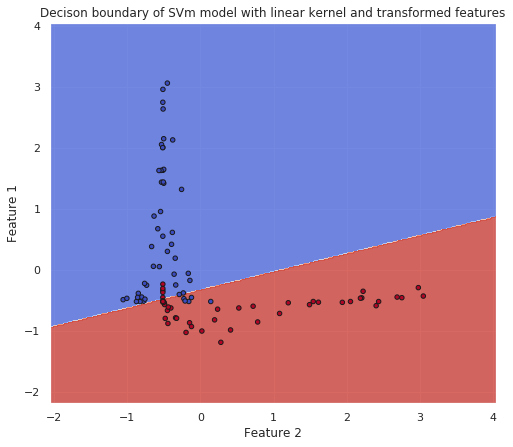

In [11]:
scv2 = SVC(kernel='linear', C=1).fit(X2, y2)

fig3, ax3 = plt.subplots(figsize=(8, 7))
X02, X12 = X2[:, 0], X2[:, 1]
xx2, yy2 = make_meshgrid(X02, X12)


plot_contours(ax3, scv2, xx2, yy2, cmap=plt.cm.coolwarm, alpha=0.8)
ax3.scatter(X02, X12, c=y2, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax3.set_ylabel('Feature 1')
ax3.set_xlabel('Feature 2')
ax3.set_title('Decison boundary of SVm model with linear kernel and transformed features')

The main idea behind Support Vector Machines is finding a hyperplane that best divides a dataset into two classes. The goal is to choose a hyperplane with the greatest possible margin between the hyperplane and any point within the training set. If there is no clear margin than we use kerneling, we map the data to a higher dimension. The data will continue to be mapped into higher and higher dimensions until a hyperplane can be formed to segregate it.

# Task 3

In [12]:
# importing the cancerseek data from 2 weeks ago
df = pd.read_csv('cancerseek.csv')
y3 = df['Tumor type']
df3 = df.drop(['Unnamed: 0', 'Tumor type'], axis=1)
cancerseek_y = pd.read_csv('cancerseek_y.csv', header=None)
cancerseek_y.drop([0], axis=1, inplace=True)

In [13]:
train_X = df3.iloc[::2, :]
train_y = y3.iloc[0::2]
test_X = df3.iloc[1::2, :]
test_y = y3[1::2]

In [14]:
svc3 = SVC(probability=True).fit(train_X, train_y)
svc_y = svc3.predict(test_X)

In [15]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix


fpr, tpr, thresholds= roc_curve(y_score=svc_y, y_true=test_y)
roc_auc = roc_auc_score(test_y, svc_y)

fpr2, tpr2, thresholds2= roc_curve(y_score=cancerseek_y, y_true=test_y)
roc_auc2 = roc_auc_score(test_y, cancerseek_y)

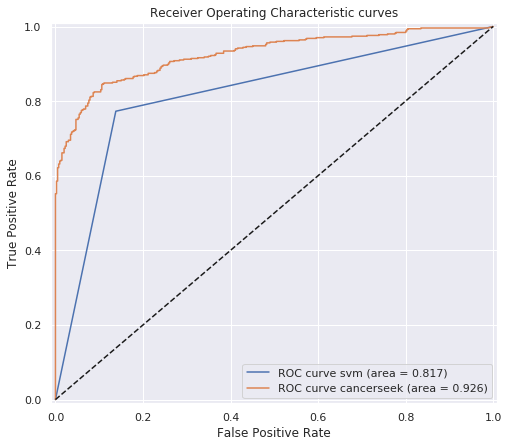

In [16]:
plt.figure(figsize=(8, 7))
plt.plot(fpr, tpr, label='ROC curve svm (area = %0.3f)' % roc_auc)
plt.plot(fpr2, tpr2, label='ROC curve cancerseek (area = %0.3f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curves')
plt.legend(loc="lower right")

In [17]:
print(svc_y[:5])

[1 0 1 1 1]


The default svm model always predicts cancer on the unscaled data, obviously the cancerseek model is better under these circumstances

# Task 4

In [18]:
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)

In [19]:
svc4 = SVC(probability=True).fit(train_X, train_y)
svc_y4 = svc4.predict(test_X)

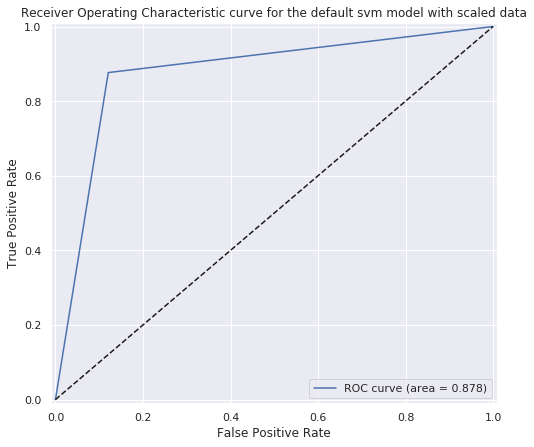

In [20]:
fpr4, tpr4, thresholds= roc_curve(y_score=svc_y4, y_true=test_y)
roc_auc4 = roc_auc_score(test_y, svc_y4)

plt.figure(figsize=(8, 7))
plt.plot(fpr4, tpr4, label='ROC curve (area = %0.3f)' % roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve for the default svm model with scaled data')
plt.legend(loc="lower right")

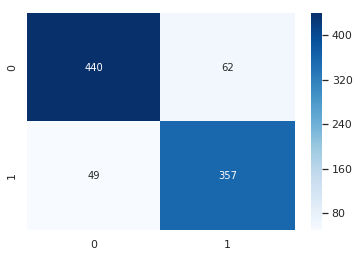

In [21]:
cm = confusion_matrix(test_y, svc_y4, labels=[1, 0])

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

It performs much better than last time, it looks like scling data is a must for the svc.

In [22]:
svc_lin = SVC(probability=True, kernel='linear').fit(train_X, train_y)
svc_y_lin = svc_lin.predict(test_X)

svc_poly = SVC(probability=True, kernel='poly').fit(train_X, train_y)
svc_y_poly = svc_poly.predict(test_X)

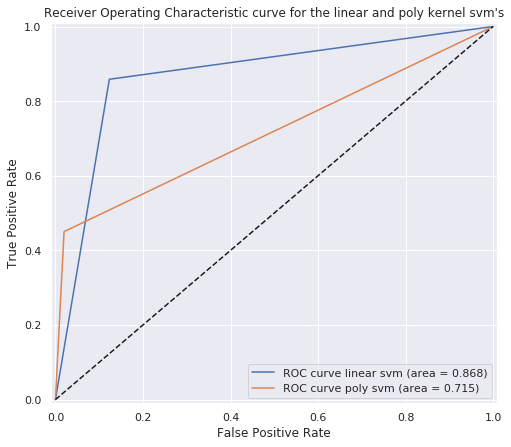

In [23]:
fpr5, tpr5, thresholds= roc_curve(y_score=svc_y_lin, y_true=test_y)
roc_auc5 = roc_auc_score(test_y, svc_y_lin)

fpr6, tpr6, thresholds= roc_curve(y_score=svc_y_poly, y_true=test_y)
roc_auc6 = roc_auc_score(test_y, svc_y_poly)


plt.figure(figsize=(8, 7))
plt.plot(fpr5, tpr5, label='ROC curve linear svm (area = %0.3f)' % roc_auc5)
plt.plot(fpr6, tpr6, label='ROC curve poly svm (area = %0.3f)' % roc_auc6)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve for the linear and poly kernel svm\'s')
plt.legend(loc="lower right")

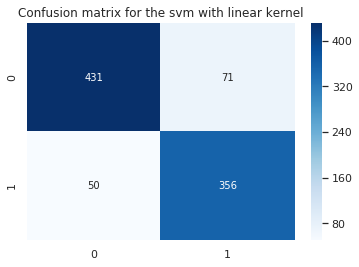

In [24]:
cm2 = confusion_matrix(test_y, svc_y_lin, labels=[1, 0])
plt.title('Confusion matrix for the svm with linear kernel')

sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g')

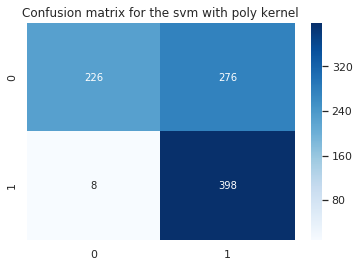

In [25]:
cm3 = confusion_matrix(test_y, svc_y_poly, labels=[1, 0])
plt.title('Confusion matrix for the svm with poly kernel')

sns.heatmap(cm3, annot=True, cmap='Blues', fmt='g')

The svm with linear kernel performs much better on this data than the one with poly kernel.

# Task 5

In [26]:
from sklearn.model_selection import train_test_split


X_train5, X5, y_train5, y5 = train_test_split(df3, y3, test_size=0.3, random_state=42)
X_valid5, X_test5, y_valid5, y_test5 = train_test_split(X5, y5, test_size=0.5, random_state=42)

In [27]:
# scaling the data based on the training data
scaler5 = StandardScaler()
X_train5 = scaler5.fit_transform(X_train5)
X_test5 = scaler5.transform(X_test5)
X_valid5 = scaler5.transform(X_valid5)

In [28]:
# calculating auc score, and mae's for various C's
roc_auc51 = []
c = np.linspace(1, 100, 10)
train = []
test = []
valid = []

for i in range(len(c)):
    svc5 = SVC(probability=True, kernel='linear', C=c[i])
    pred = svc5.fit(X_train5, y_train5).predict(X_valid5)
    roc_auc51.append(roc_auc_score(y_valid5, pred))
    
    pred_train = svc5.predict(X_train5)
    train.append(np.mean(abs((y_train5-pred_train))))
    
    pred_test= svc5.predict(X_test5)
    test.append(np.mean(abs((y_test5-pred_test))))
    
    pred_valid = svc5.predict(X_valid5)
    valid.append(np.mean(abs((y_valid5-pred_valid))))

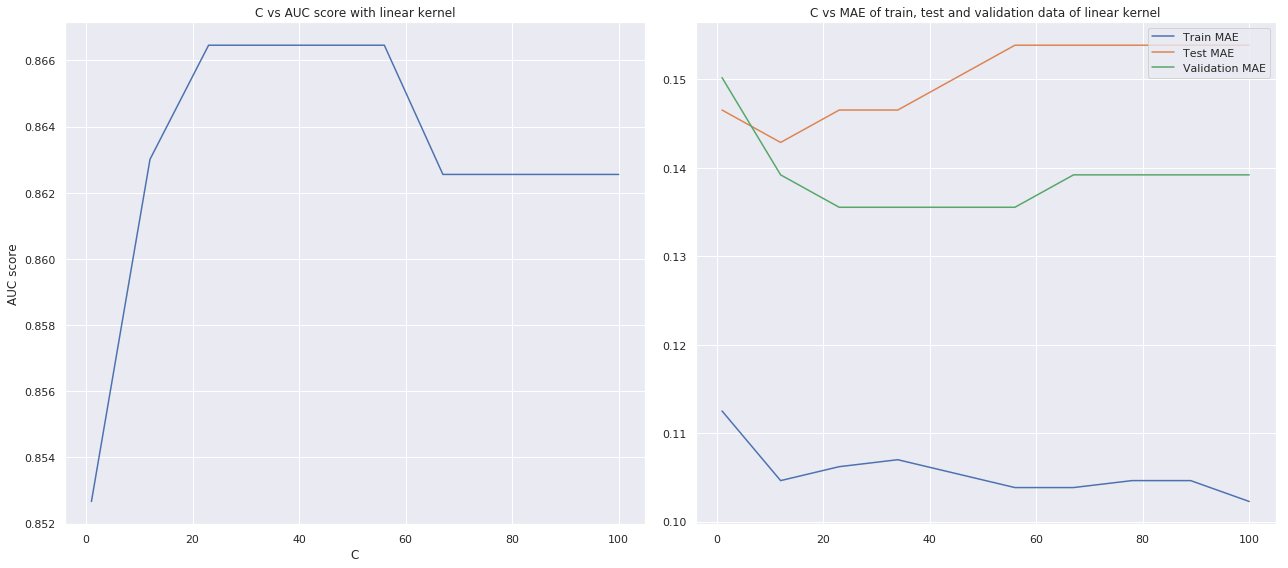

In [29]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.plot(c, roc_auc51)
plt.xlabel('C', size=12)
plt.ylabel('AUC score', size=12)
plt.title('C vs AUC score with linear kernel')

plt.subplot(1, 2, 2)
plt.plot(c, train, label='Train MAE')
plt.plot(c, test, label='Test MAE')
plt.plot(c, valid, label='Validation MAE')
plt.legend(loc='upper right')
plt.title('C vs MAE of train, test and validation data of linear kernel')

plt.tight_layout()

We rely on validation data when tuning hyperparameters since the results might depend on which part of the dataset we got.

In [30]:
# calculating auc score gammas
roc_auc52 = []
g = np.linspace(1e-4, 1e-2, 10)

for i in range(len(c)):
    pred = SVC(probability=True, kernel='poly', gamma=g[i]).fit(X_train5, y_train5).predict(X_valid5)
    roc_auc52.append(roc_auc_score(y_valid5, pred))

Text(0.5, 1.0, 'Gamma vs AUC score with poly kernel')

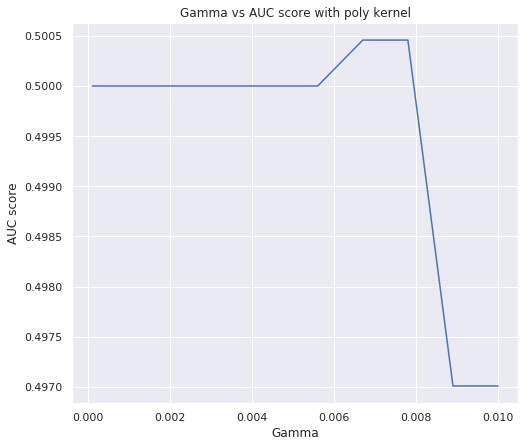

In [31]:
plt.figure(figsize=(8, 7))
plt.plot(g, roc_auc52,)
plt.xlabel('Gamma', size=12)
plt.ylabel('AUC score', size=12)
plt.title('Gamma vs AUC score with poly kernel')

In [32]:
# calculating auc score, and mae's for various C's
roc_auc53 = []
c2 = np.linspace(1, 100, 10)
train2 = []
test2 = []
valid2 = []

for i in range(len(c)):
    svc52 = SVC(probability=True, kernel='poly', gamma=0.007, C=c2[i])
    pred2 = svc52.fit(X_train5, y_train5).predict(X_valid5)
    roc_auc53.append(roc_auc_score(y_valid5, pred2))
    
    pred_train2 = svc52.predict(X_train5)
    train2.append(np.mean(abs((y_train5-pred_train2))))
    
    pred_test2 = svc52.predict(X_test5)
    test2.append(np.mean(abs((y_test5-pred_test2))))
    
    pred_valid2 = svc52.predict(X_valid5)
    valid2.append(np.mean(abs((y_valid5-pred_valid2))))

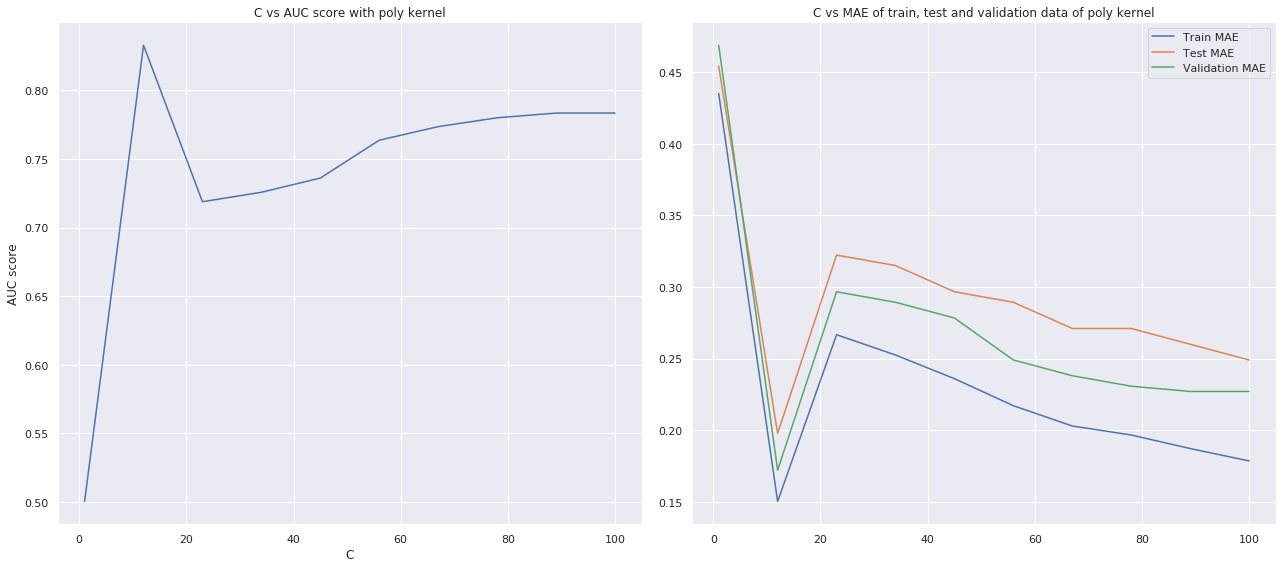

In [33]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.plot(c2, roc_auc53)
plt.xlabel('C', size=12)
plt.ylabel('AUC score', size=12)
plt.title('C vs AUC score with poly kernel')

plt.subplot(1, 2, 2)
plt.plot(c2, train2, label='Train MAE')
plt.plot(c2, test2, label='Test MAE')
plt.plot(c2, valid2, label='Validation MAE')
plt.legend(loc='upper right')
plt.title('C vs MAE of train, test and validation data of poly kernel')

plt.tight_layout()

In [34]:
# importing all the cancerseek predictions
cancerseek_yf = pd.read_csv('cancerseek_yf.csv', header=None)
cancerseek_yf.drop([0], axis=1, inplace=True)

In [35]:
# splitting the data 0.8/0.2 and doing so with the cancerseek predictions
X_trainf, X_testf, y_trainf, y_testf = train_test_split(df3, y3, test_size=0.2, random_state=42)
dummy1, dummy2, dummy3, cancerseekf = train_test_split(df3, cancerseek_yf, test_size=0.2, random_state=42)

X_trainf = scaler5.fit_transform(X_trainf)
X_testf = scaler5.transform(X_testf)

In [36]:
# training model
svcf = SVC(probability=True, kernel='linear', C=15).fit(X_trainf, y_trainf).predict(X_testf)

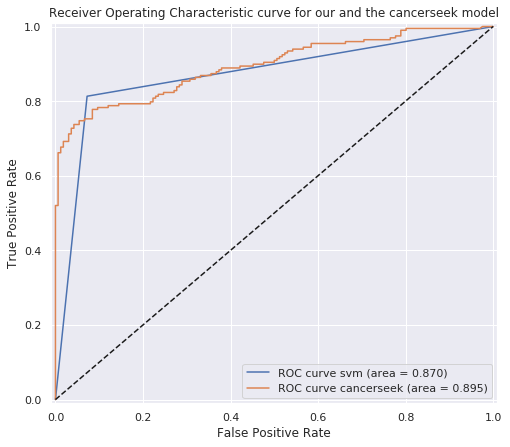

In [37]:
# calculating roc curves than plotting them
fprf, tprf, thresholds= roc_curve(y_score=svcf, y_true=y_testf)
roc_aucf = roc_auc_score(y_testf, svcf)

fprf2, tprf2, thresholds= roc_curve(y_score=cancerseekf, y_true=y_testf)
roc_aucf2 = roc_auc_score(y_testf, cancerseekf)


plt.figure(figsize=(8, 7))
plt.plot(fprf, tprf, label='ROC curve svm (area = %0.3f)' % roc_aucf)
plt.plot(fprf2, tprf2, label='ROC curve cancerseek (area = %0.3f)' % roc_aucf2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve for our and the cancerseek model')
plt.legend(loc="lower right")

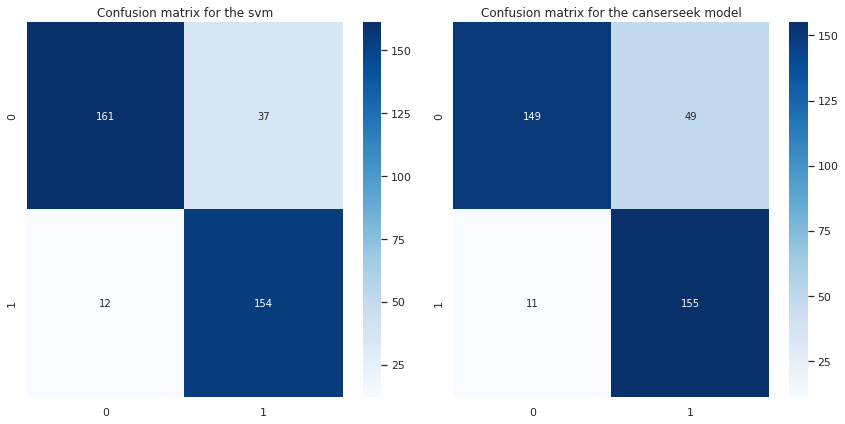

In [38]:
# calculating confusion matrices
cmf = confusion_matrix(y_testf, svcf, labels=[1, 0])        
cmf2 = confusion_matrix(y_testf, np.round(cancerseekf), labels=[1, 0])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Confusion matrix for the svm')
sns.heatmap(cmf, annot=True, cmap='Blues', fmt='g')

plt.subplot(1, 2, 2)
plt.title('Confusion matrix for the canserseek model')
sns.heatmap(cmf2, annot=True, cmap='Blues', fmt='g')

plt.tight_layout()